# Creating some figures 

In [48]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cmocean as cm

In [49]:
import warnings
#warnings.filterwarnings("ignore")

In [136]:
# load data

file_name = "data/Rockall-Trough-Mooring-Time-Series-2020.nc"
ds = xr.open_dataset(file_name)

# making DEPTH a coordinate
ds.coords['DEPTH']=ds.PRES

# creating a new array in our ds that has the unit °C for temperature instead of K
# for TG_EAST
ds['TG_EAST_C'] = ds.TG_EAST-273.15
ds.TG_EAST_C.attrs = ds.TG_EAST.attrs 
ds.TG_EAST_C.attrs['units'] = 'degC'
ds.TG_EAST_C.attrs

# and TG_WEST
ds['TG_WEST_C'] = ds.TG_WEST-273.15
ds.TG_WEST_C.attrs = ds.TG_WEST.attrs 
ds.TG_WEST_C.attrs['units'] = 'degC'
ds.TG_WEST_C.attrs

ds

<xarray.Dataset>
Dimensions:    (DEPTH: 101, TIME: 4667)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2014-06-01 ... 2020-10-20
  * DEPTH      (DEPTH) float32 0.0 20.0 40.0 60.0 ... 1.96e+03 1.98e+03 2e+03
Data variables: (12/16)
    PRES       (DEPTH) float32 ...
    TG_EAST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    SG_EAST    (TIME, DEPTH) float32 ...
    SG_WEST    (TIME, DEPTH) float32 ...
    U_WEST_1   (TIME, DEPTH) float32 ...
    ...         ...
    W_WEST_2   (TIME, DEPTH) float32 ...
    U_EAST     (TIME, DEPTH) float32 ...
    V_EAST     (TIME, DEPTH) float32 ...
    W_EAST     (TIME, DEPTH) float32 ...
    TG_EAST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/24)
    title:                         CLASS Rockall Trough mooring data 06/2014-...
    institution:                   Scottish Association for Marine Science, S...
    history:                       Delayed time processed quality controlled
    id:                            Rockall-Trough-Mooring-Time-Series-2020
    source:                        subsurface mooring
    project:                       Climate Linked Atlantic Sector Science
    ...                            ...
    citation:                      These data were collected and made freely ...
    acknowledgement:               Funding source: the UK Natural Environment...
    date_created:                  2021-04-15T23:49:44Z
    date_modified:                 2021-04-15T23:49:44Z
    processing_level:              
    QC_indicator:

In [143]:
# reduce the size of the ds to only include the variables I am intersted in -› drop salinity and any velocity data

ds_temp = (ds.drop_vars('PRES') + ds.drop_vars('SG_EAST') + ds.drop_vars('SG_WEST') 
          + ds.drop_vars('U_WEST_1') + ds.drop_vars('V_WEST_1') + ds.drop_vars('W_WEST_1') 
          + ds.drop_vars('U_WEST_2') + ds.drop_vars('V_WEST_2') + ds.drop_vars('W_WEST_2') 
          + ds.drop_vars('U_EAST') + ds.drop_vars('V_EAST') + ds.drop_vars('W_EAST')) 

ds_temp

<xarray.Dataset>
Dimensions:    (DEPTH: 101, TIME: 4667)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2014-06-01 ... 2020-10-20
  * DEPTH      (DEPTH) float32 0.0 20.0 40.0 60.0 ... 1.96e+03 1.98e+03 2e+03
Data variables:
    TG_EAST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_EAST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan

In [51]:
#ds.TIME.dt.hour.plot.line('.');
ds.TIME.dt.hour
ds.TG_EAST["DEPTH"]


<xarray.DataArray 'DEPTH' (DEPTH: 101)>
array([   0.,   20.,   40.,   60.,   80.,  100.,  120.,  140.,  160.,  180.,
        200.,  220.,  240.,  260.,  280.,  300.,  320.,  340.,  360.,  380.,
        400.,  420.,  440.,  460.,  480.,  500.,  520.,  540.,  560.,  580.,
        600.,  620.,  640.,  660.,  680.,  700.,  720.,  740.,  760.,  780.,
        800.,  820.,  840.,  860.,  880.,  900.,  920.,  940.,  960.,  980.,
       1000., 1020., 1040., 1060., 1080., 1100., 1120., 1140., 1160., 1180.,
       1200., 1220., 1240., 1260., 1280., 1300., 1320., 1340., 1360., 1380.,
       1400., 1420., 1440., 1460., 1480., 1500., 1520., 1540., 1560., 1580.,
       1600., 1620., 1640., 1660., 1680., 1700., 1720., 1740., 1760., 1780.,
       1800., 1820., 1840., 1860., 1880., 1900., 1920., 1940., 1960., 1980.,
       2000.], dtype=float32)
Coordinates:
  * DEPTH    (DEPTH) float32 0.0 20.0 40.0 60.0 ... 1.96e+03 1.98e+03 2e+03
Attributes:
    standard_name:  sea_water_pressure
    units:          decibar
    coordinates:    DEPTH
    long_name:      pressure grid
    axis:           Z
    positive:       down
    QC_indicator:   good data

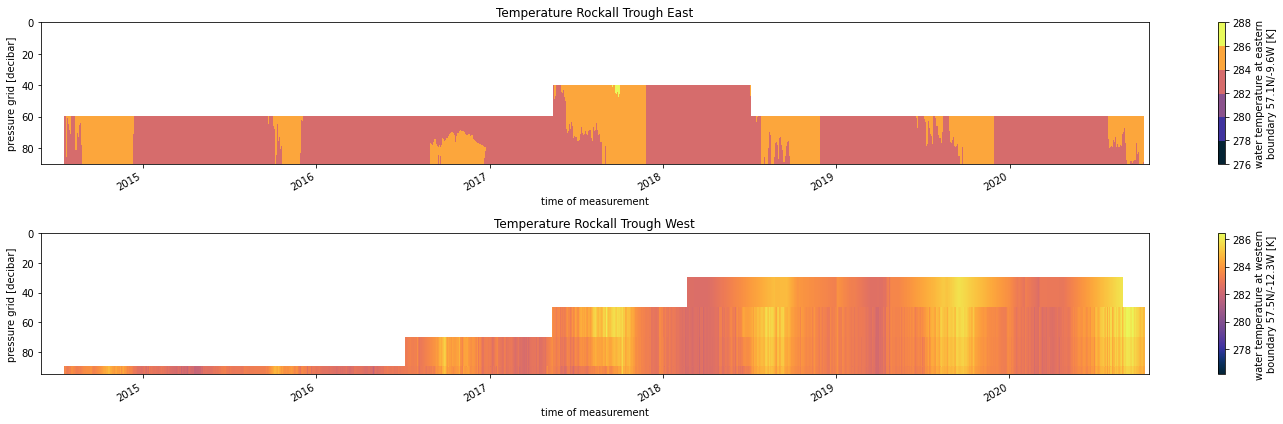

In [52]:
fig, ax = plt.subplots(2, 1, figsize = (20, 6))

ds.TG_EAST.plot.contourf(ax=ax[0], x = 'TIME', y = 'DEPTH', ylim = (90, 0), cmap = cm.cm.thermal);
ax[0].set_title("Temperature Rockall Trough East");
ds.TG_WEST.plot(ax=ax[1], x = 'TIME', ylim = (95, 0), cmap = cm.cm.thermal);
ax[1].set_title("Temperature Rockall Trough West");

#use ... .plot.contourf ... to get a more clearly defined colorbar and use yincrease = False instead of ylim = (100, 0)

fig.tight_layout();

In [53]:
# try and slice the dataset ... so that I only get the temperature data of one spcific depth

In [54]:
ds.TG_WEST.sel(DEPTH = 20)

<xarray.DataArray 'TG_WEST' (TIME: 4667)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
  * TIME     (TIME) datetime64[ns] 2014-06-01 2014-06-01T12:00:00 ... 2020-10-20
    DEPTH    float32 20.0
Attributes:
    standard_name:    sea_water_conservative_temperature
    units:            K
    coordinates:      TIME DEPTH
    long_name:        water temperature at western boundary 57.5N/-12.3W
    reference_scale:  ITS-90
    QC_indicator:     good data
    valid_min:        0.0
    valid_max:        100.0

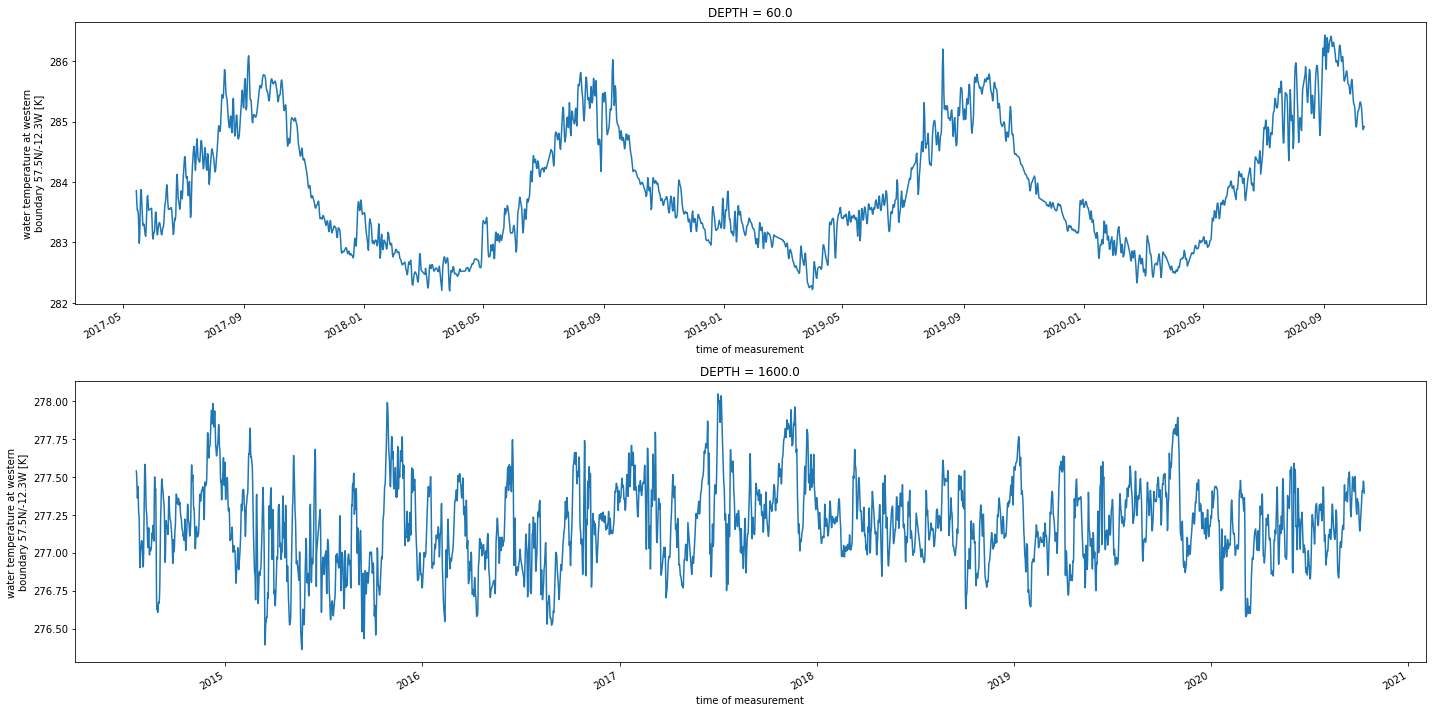

In [55]:
fig, ax = plt.subplots(2, 1, figsize = (20, 10))
ds.TG_WEST[:,3].plot(ax=ax[0]);
ds.TG_WEST[:,80].plot(ax=ax[1]);

fig.tight_layout();

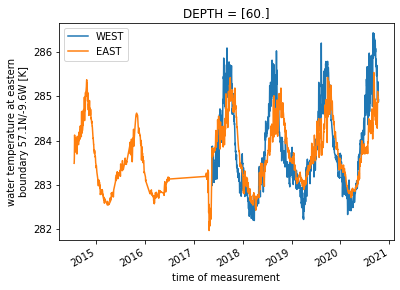

In [56]:
ds.TG_WEST.sel(DEPTH=[50], method = 'nearest').plot.line(x = 'TIME', label = 'WEST');
ds.TG_EAST.sel(DEPTH=[50], method = 'nearest').plot.line(x = 'TIME', label = 'EAST');

plt.legend();

In [57]:
# depth is in decibar (negeting 1 bar pressure at surface) -› it is a 20 db grid so 1 = 20 db 
temp10 = ds.TG_WEST[:,10] # = 200db = 200m
temp80 = ds.TG_WEST[:,80] # = 1600db = 1600m

In [58]:
temp10degC = (temp10)-273.15
temp80degC = (temp80)-273.15

temp10degC


<xarray.Dataset>
Dimensions:    (DEPTH: 101, TIME: 4667)
Coordinates:
  * TIME       (TIME) datetime64[ns] 2014-06-01 ... 2020-10-20
  * DEPTH      (DEPTH) float32 0.0 20.0 40.0 60.0 ... 1.96e+03 1.98e+03 2e+03
Data variables: (12/15)
    PRES       (DEPTH) float32 0.0 20.0 40.0 60.0 ... 1.96e+03 1.98e+03 2e+03
    TG_EAST    (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
    TG_WEST    (TIME, DEPTH) float32 ...
    SG_EAST    (TIME, DEPTH) float32 ...
    SG_WEST    (TIME, DEPTH) float32 ...
    U_WEST_1   (TIME, DEPTH) float32 ...
    ...         ...
    V_WEST_2   (TIME, DEPTH) float32 ...
    W_WEST_2   (TIME, DEPTH) float32 ...
    U_EAST     (TIME, DEPTH) float32 ...
    V_EAST     (TIME, DEPTH) float32 ...
    W_EAST     (TIME, DEPTH) float32 ...
    TG_EAST_C  (TIME, DEPTH) float32 nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/24)
    title:                         CLASS Rockall Trough mooring data 06/2014-...
    institution:                   Scottish Association for Marine Science, S...
    history:                       Delayed time processed quality controlled
    id:                            Rockall-Trough-Mooring-Time-Series-2020
    source:                        subsurface mooring
    project:                       Climate Linked Atlantic Sector Science
    ...                            ...
    citation:                      These data were collected and made freely ...
    acknowledgement:               Funding source: the UK Natural Environment...
    date_created:                  2021-04-15T23:49:44Z
    date_modified:                 2021-04-15T23:49:44Z
    processing_level:              
    QC_indicator:

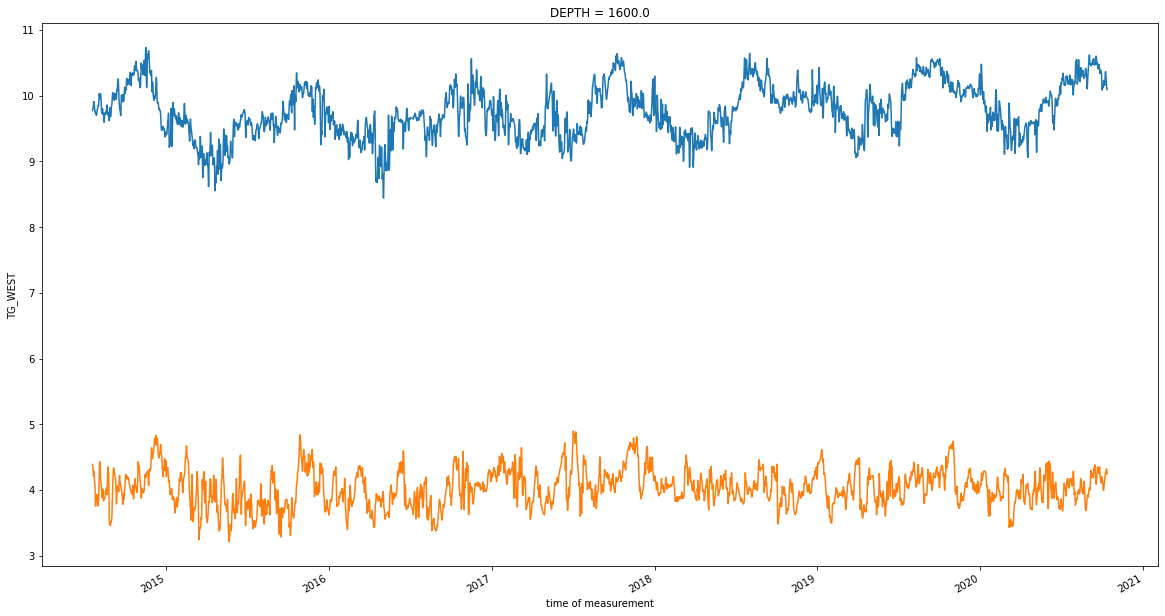

In [59]:
temp10degC.plot(figsize = (20, 10));
temp80degC.plot();


In [66]:
import marineHeatWaves as mhw

In [76]:
# lets see what I can do 
# mhws, clim = mhw.detect(t, sst) I will try to pick out time from TG_WEST dataset and use temp800 for the st (sea temperature)

from datetime import date

#t = np.arange(date(1982,1,1).toordinal(),date(2014,12,31).toordinal()+1)

time = ds.TIME
temp = ds.TG_EAST.sel(DEPTH = 100)

#np.datetime64(ds.TIME).to_datetime()

In [68]:
mhw.detect?

Signature:
mhw.detect(
    t,
    temp,
    climatologyPeriod=[None, None],
    pctile=90,
    windowHalfWidth=5,
    smoothPercentile=True,
    smoothPercentileWidth=31,
    minDuration=5,
    joinAcrossGaps=True,
    maxGap=2,
    maxPadLength=False,
    coldSpells=False,
    alternateClimatology=False,
    Ly=False,
)
Docstring:
Applies the Hobday et al. (2016) marine heat wave definition to an input time
series of temp ('temp') along with a time vector ('t'). Outputs properties of
all detected marine heat waves.

Inputs:

  t       Time vector, in datetime format (e.g., date(1982,1,1).toordinal())
          [1D numpy array of length T]
  temp    Temperature vector [1D numpy array of length T]

Outputs:

  mhw     Detected marine heat waves (MHWs). Each key (following list) is a
          list of length N where N is the number of detected MHWs:

    'time_start'           Start time of MHW [datetime format]
    'time_end'             End time of MHW [datetime format]
    'time_peak'

In [77]:
mhws, clim = mhw.detect(time, temp)

OverflowError: signed integer is greater than maximum

In [276]:
mhws['n_events']

0

In [316]:
st = temp100

In [317]:
mhws, clim = mhw.detect(t, st)

In [318]:
mhws['n_events']

0

# Summary
what I did here was not very efficient or practical but it sort of gave me an idea what I was doing...
### Key points
- DEPTH is in a 20db grid -› this means that DEPTH 20 = 20*20db ~400m
- TIME resolution
- the algorithm did not detect anything for the data I fed it ... ~100 & 800m depth
- BUT I did not use my own climatology so I have no idea what the baseline is the algorithm tried to compare my data to or if the mhw package claculates the climatology from the availabel data??